In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/electricity-generated-in-us-by-sector/Net_generation_United_States_all_sectors_monthly.csv')
df.head()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


#### I'm renaming the column names for my inconvenience 

In [3]:
# Create a dictionary for renaming columns
new_column_names = {
    'Month': 'months',
    'all fuels (utility-scale) thousand megawatthours': 'all fuels',
    'coal thousand megawatthours': 'coal',
    'natural gas thousand megawatthours': 'natural gas',
    'nuclear thousand megawatthours': 'nuclear',
    'conventional hydroelectric thousand megawatthours': 'conventional hydroelectric',
    'wind thousand megawatthours': 'wind',
    'all solar thousand megawatthours': 'all solar'
}

# Renaming columns using the rename method
df.rename(columns=new_column_names,inplace=True)

In [4]:
df.head()

,months,all fuels,coal,natural gas,nuclear,conventional hydroelectric,wind,all solar
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
all fuels,273.0,337947.552655,35061.580185,278078.87100,310602.96380,329838.82240,358630.10220,425611.32840
coal,273.0,127251.140876,39820.581811,40078.66802,91145.41119,135634.73330,159439.51730,190134.81630
natural gas,273.0,94470.528113,34945.840051,37966.92700,65631.01800,91739.07009,117351.49290,200506.75920
nuclear,273.0,65870.679758,4810.864494,54547.33800,62638.95000,65638.14100,69870.97800,74649.04000
conventional hydroelectric,273.0,22411.638500,3970.188494,14367.41841,19470.63281,22033.85574,25079.21697,32607.11514
wind,273.0,13404.842666,11655.653613,389.25000,2442.12988,11519.76842,22100.72207,46167.09477
all solar,117.0,9311.091148,6193.340439,1375.15155,4142.59215,8184.13587,12437.95751,26538.55725


# Data Visualization

In [6]:
# Convert 'Month' column to datetime format
df['months'] = pd.to_datetime(df['months'], format='%b-%y')

# Set 'Month' as the index for time series plotting
df.set_index('months', inplace=True)

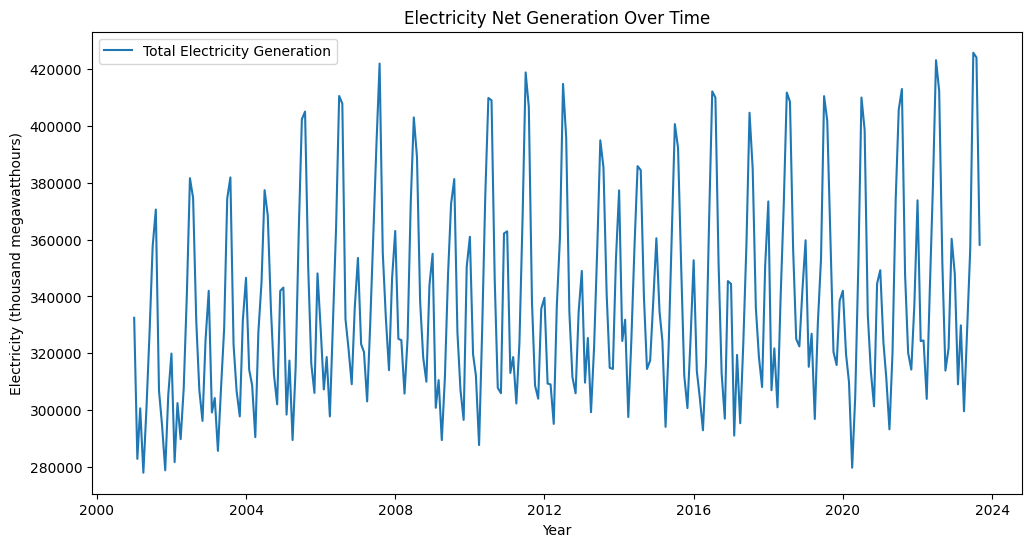

In [7]:
# Plot the overall electricity net generation over time
plt.figure(figsize=(12, 6))
plt.plot(df['all fuels'], label='Total Electricity Generation')
plt.title('Electricity Net Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity (thousand megawatthours)')
plt.legend()
plt.show()

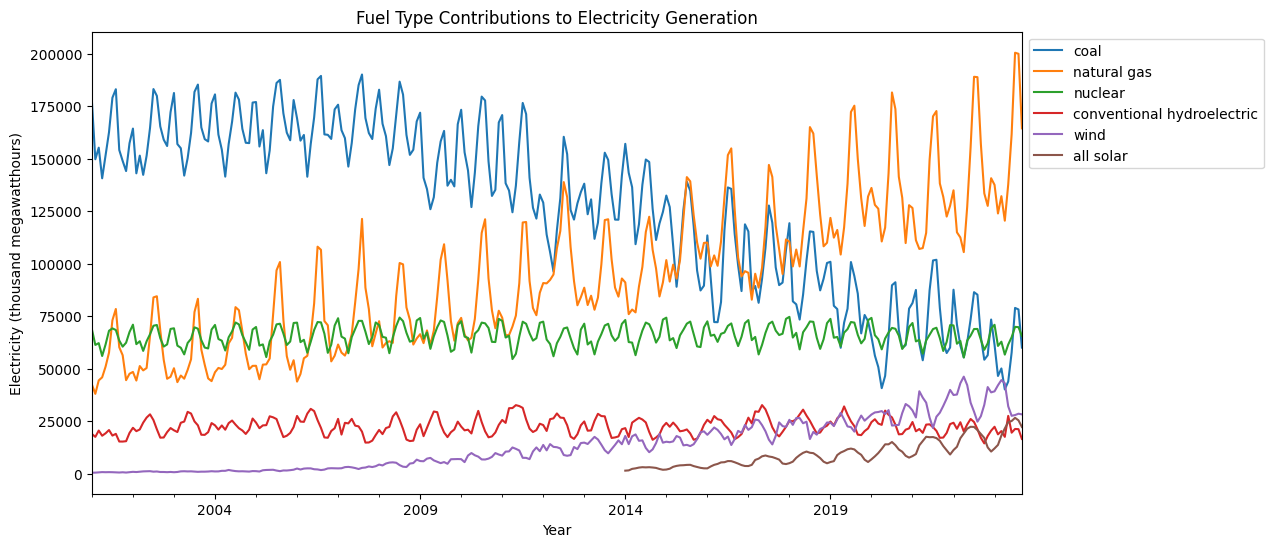

In [8]:
# Plot the contributions of different fuel types
fuel_types = df.columns[1:]  # Exclude the 'Month' column
df[fuel_types].plot(figsize=(12, 6))
plt.title('Fuel Type Contributions to Electricity Generation')
plt.xlabel('Year')
plt.ylabel('Electricity (thousand megawatthours)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

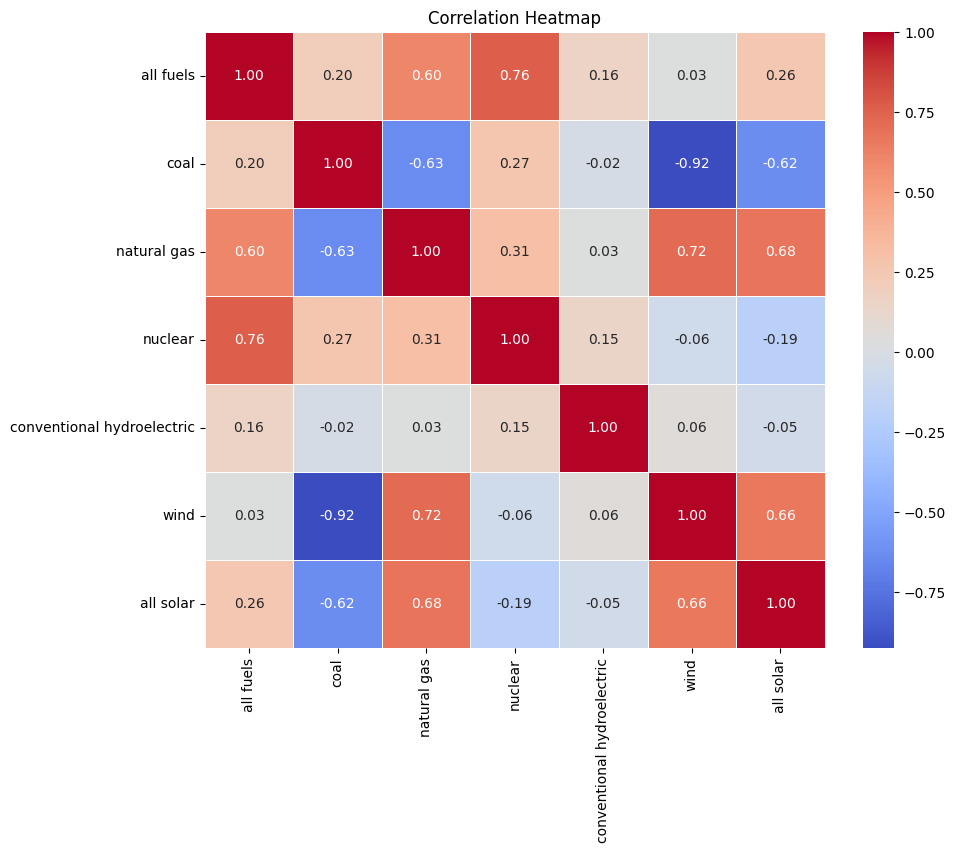

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

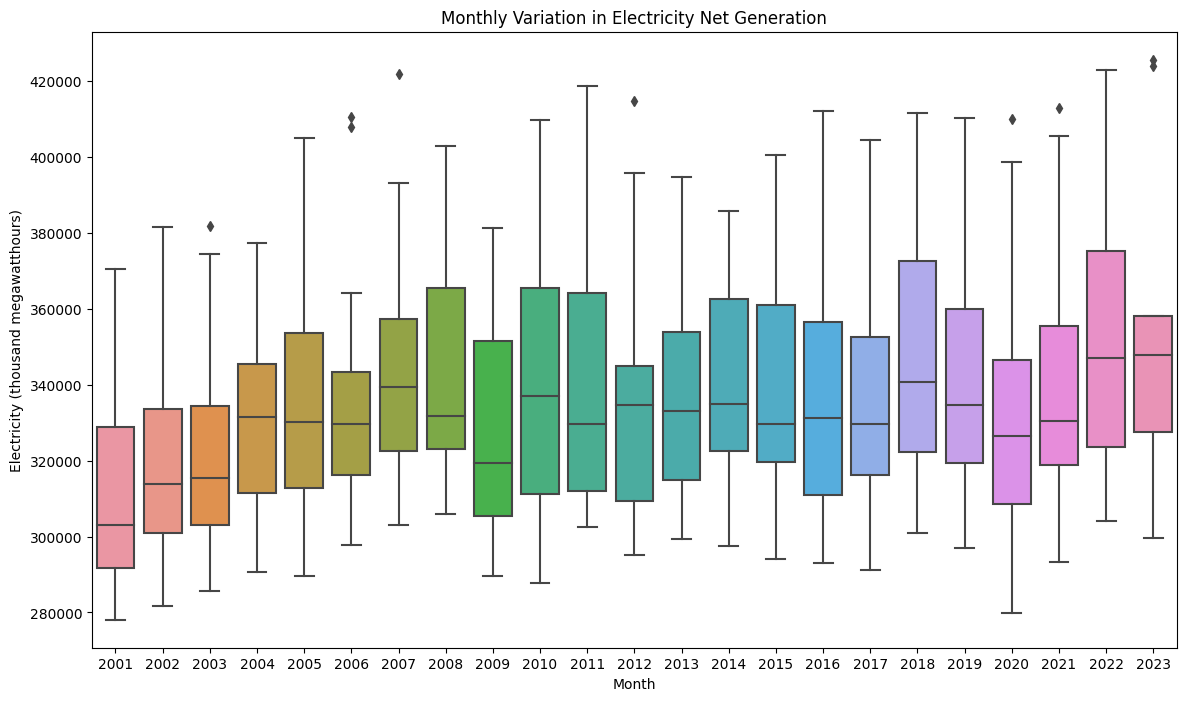

In [10]:
# Create box plots to visualize the monthly variation for each fuel type
plt.figure(figsize=(14, 8))
sns.boxplot(x=df.index.year, y=df['all fuels'])
plt.title('Monthly Variation in Electricity Net Generation')
plt.xlabel('Month')
plt.ylabel('Electricity (thousand megawatthours)')
plt.show()


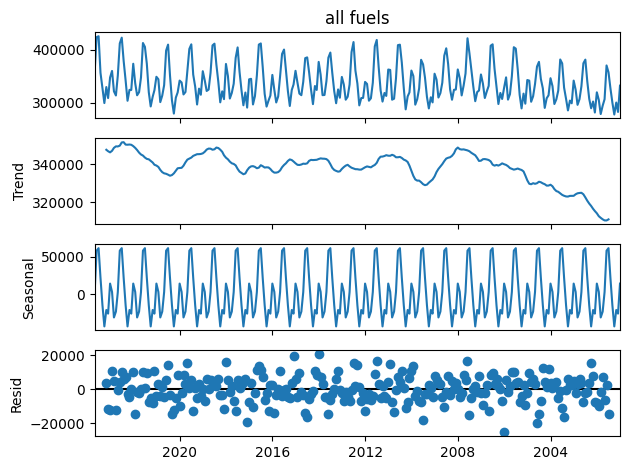

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of the overall electricity net generation
result = seasonal_decompose(df['all fuels'], model='additive', period=12)
result.plot()
plt.show()


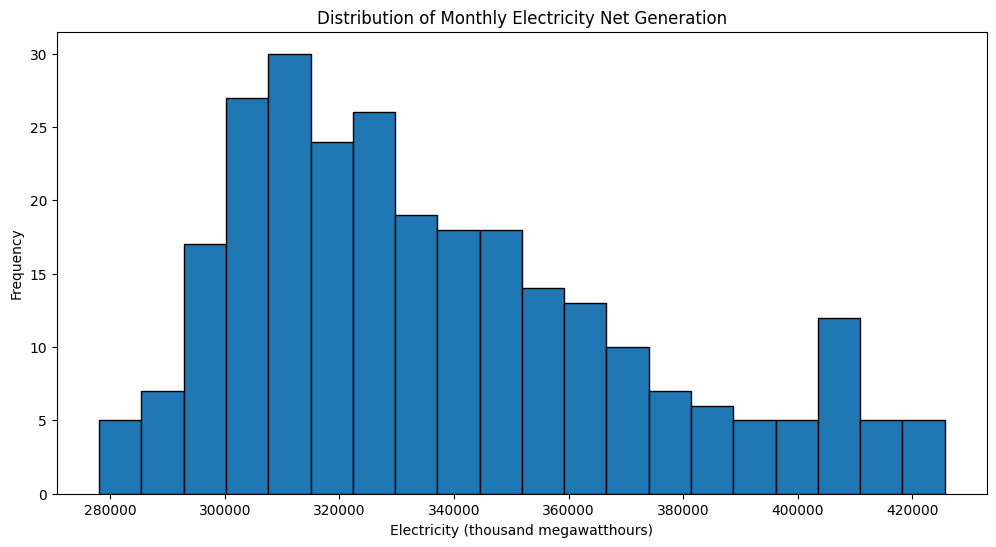

In [12]:
# Create a histogram to visualize the distribution of monthly electricity generation
plt.figure(figsize=(12, 6))
plt.hist(df['all fuels'], bins=20, edgecolor='black')
plt.title('Distribution of Monthly Electricity Net Generation')
plt.xlabel('Electricity (thousand megawatthours)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x600 with 0 Axes>

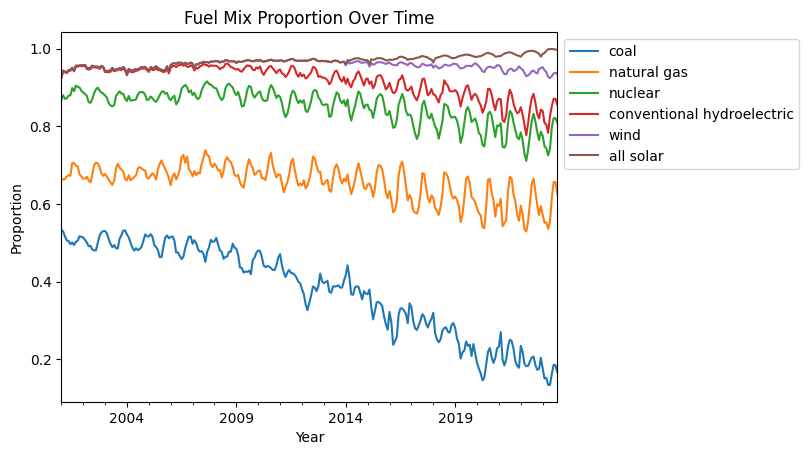

In [13]:
# Calculate the proportion of each fuel type over time
fuel_types = df.columns[1:]  # Exclude the 'Month' column
df_fuel_proportion = df[fuel_types].div(df['all fuels'], axis=0)

# Plot the fuel mix proportion over time
plt.figure(figsize=(12, 6))
df_fuel_proportion.plot(stacked=True)
plt.title('Fuel Mix Proportion Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


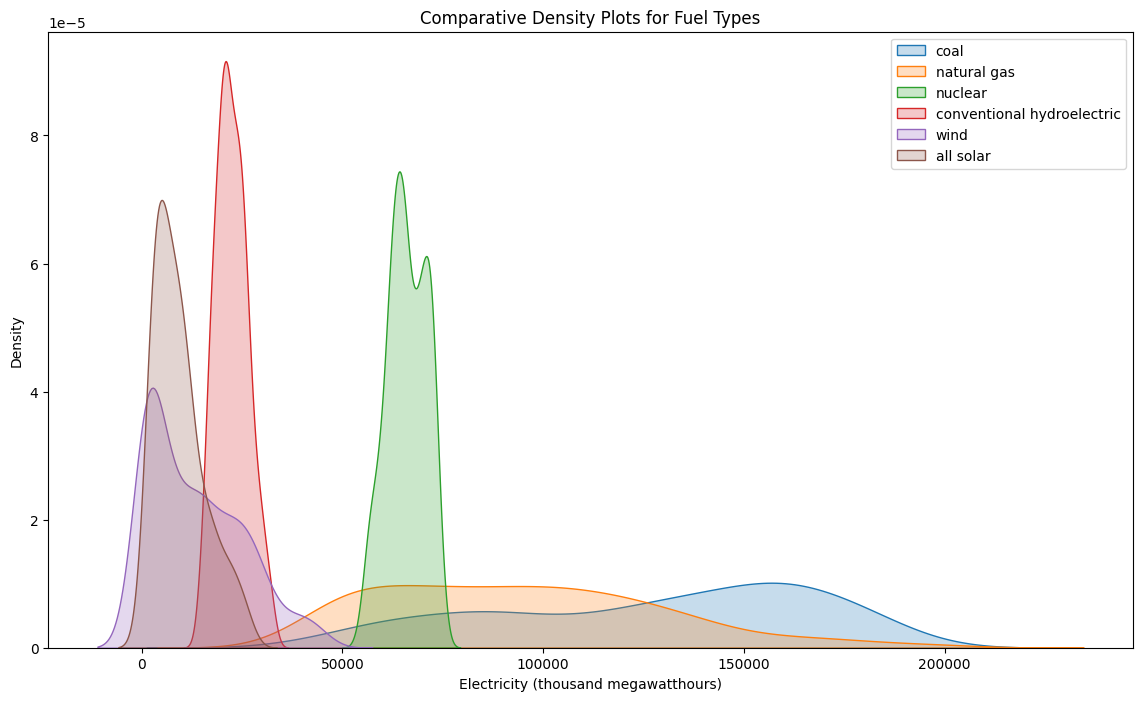

In [14]:
# Create comparative density plots for fuel types
plt.figure(figsize=(14, 8))
for fuel_type in fuel_types:
    sns.kdeplot(df[fuel_type], label=fuel_type, fill=True)

plt.title('Comparative Density Plots for Fuel Types')
plt.xlabel('Electricity (thousand megawatthours)')
plt.ylabel('Density')
plt.legend()
plt.show()

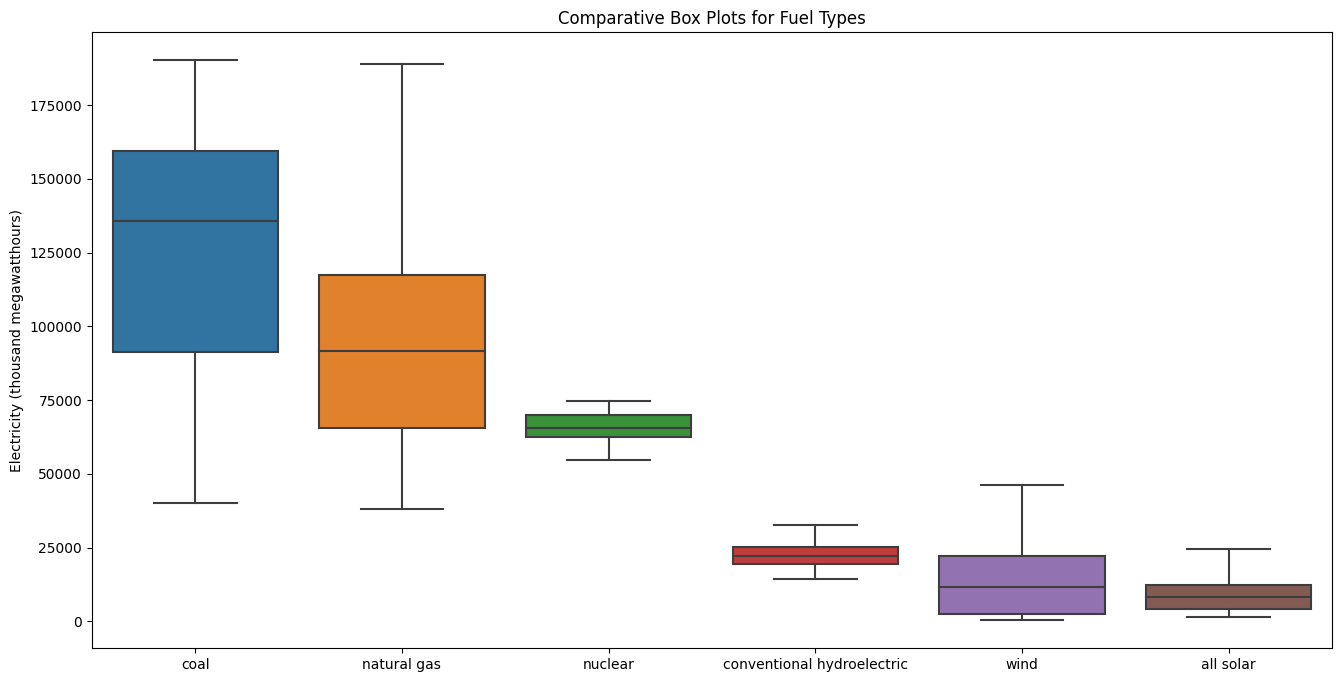

In [15]:
# Create box plots to compare the distribution of each fuel type
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.drop(columns=['all fuels']), showfliers=False)
plt.title('Comparative Box Plots for Fuel Types')
plt.ylabel('Electricity (thousand megawatthours)')
plt.show()


# Data Preprocessing 

### Gonna analysis with Timeseries forcasting so selecting the columns which will be a good fit for training 

In [16]:
df = df[['all fuels']]

In [17]:
df.head()

,all fuels
months,
2023-09-01,358136.2599
2023-08-01,423934.2574
2023-07-01,425611.3284
2023-06-01,356672.3849
2023-05-01,327532.6236


In [18]:
df.isnull().sum()

all fuels    0
dtype: int64

# Train/Test Split

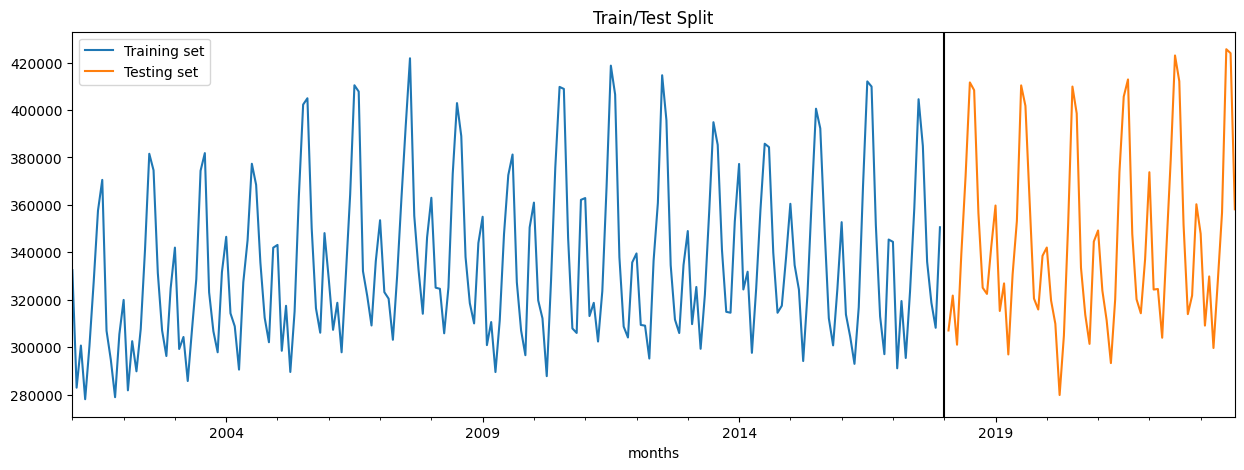

In [19]:
train =df.loc[df.index < '01-01-2018']
test = df.loc[df.index > '01-01-2018']

fig,ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax,label='Training set',title='Train/Test Split')
test.plot(ax=ax,label='Testing set')
ax.axvline('01-01-2018',color='k')
ax.legend(['Training set','Testing set'])

# Feature Selection

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
def create_features (df):
    
    df = df.copy()
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    return df

df = create_features(df)

In [22]:
df.columns

Index(['all fuels', 'month', 'quarter', 'year'], dtype='object')

In [23]:
train =df.loc[df.index < '01-01-2018']
test = df.loc[df.index > '01-01-2018']

features = ['month', 'quarter', 'year']
target = 'all fuels'

In [24]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [25]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (204, 3)
X_test shape (68, 3)
y_train shape (204,)
y_test shape (68,)


# Creating our model

In [26]:
import xgboost as xgb

In [27]:
model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.01)

In [28]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
test['prediction'] = model.predict(X_test)
df =  df.merge(test['prediction'], how='left', left_index=True, right_index=True)

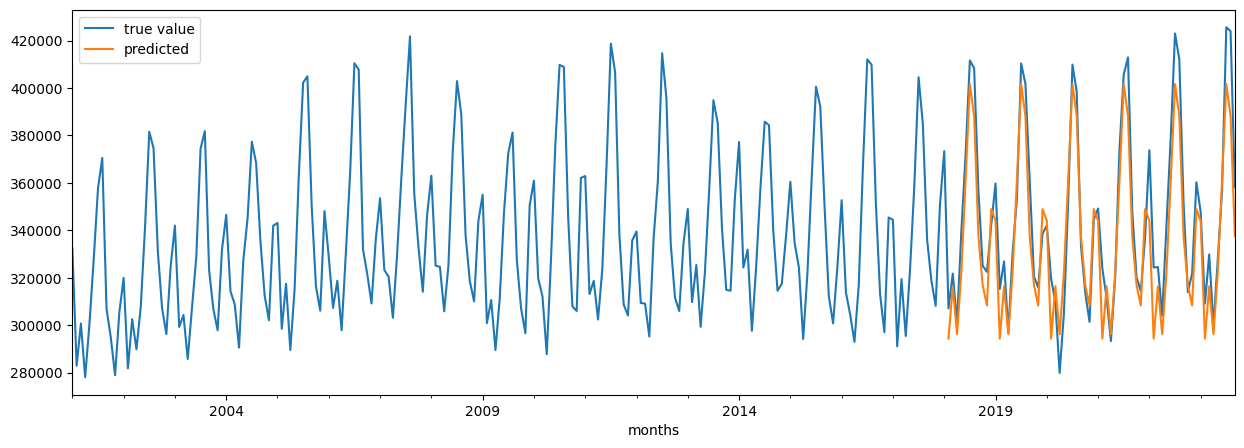

In [30]:
ax = df[['all fuels']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax)
ax.legend(['true value','predicted'])

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
print('The Root mean squared error is : ',np.sqrt(mean_squared_error(y_test,test['prediction'])))
print('And the R2 score is: ',r2_score(y_test,test['prediction']))

The Root mean squared error is :  14487.020124787896
And the R2 score is:  0.8493481500229477
